In [1]:
import time
import pandas as pd
from datetime import datetime

# Pandas -- дополнение к лекции

In [2]:
#! unzip data.zip
#! rm data.zip

Archive:  data.zip
  inflating: raw_data.tsv            
  inflating: aggregated_data.tsv     


In [3]:
df = pd.read_csv("aggregated_data.tsv", sep='\t')
df.head(3)

,word,n_tokens,n_documents
0,а,108,74
1,аббревиатур,1,1
2,абзац,5,15


Показать всю таблицу

In [6]:
#pd.set_option('display.max_rows', len(df))
#df
#pd.reset_option('display.max_rows')
#df

Посмотреть какую-нибудь подвыборку

<Axes: ylabel='Frequency'>

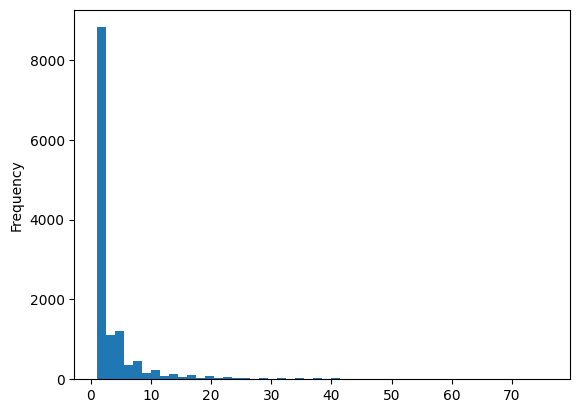

In [7]:
df['n_documents'].plot(kind='hist', bins=50)

In [ ]:
pd.cut(df['n_documents'], bins=10).value_counts()

In [ ]:
df[(df['n_documents'] > 53) & (df['n_documents'] <= 61)]

Склеивание строк в groupby

In [10]:
df = pd.read_csv('raw_data.tsv', sep='\t')

aux_1 = df.groupby('word')['filename'].apply(list).to_frame()
aux_2 = df.groupby('word')['count'].sum().to_frame()

grouped = aux_2.merge(aux_1, how='inner', left_on='word', right_on='word').reset_index()
grouped.head(3)

,word,count,filename
0,а,908,"[Глава_1.txt, Глава_10.txt, Глава_11.txt, Глав..."
1,аббревиатур,1,[Глава_76.txt]
2,абзац,22,"[Глава_14.txt, Глава_15.txt, Глава_17.txt, Гла..."


Self-join

In [11]:
df = pd.DataFrame({'employee_id': [1, 2, 3, 4, 5, 6, 7],
                   'name': ['Вася', 'Петя', 'Маша', 'Даша', 'Катя', 'Гена', 'Веня'],
                   'manager_id': [2, 5, 7, 1, 6, 2, None],
                   }).set_index('employee_id')
df

,name,manager_id
employee_id,,
1,Вася,2.0
2,Петя,5.0
3,Маша,7.0
4,Даша,1.0
5,Катя,6.0
6,Гена,2.0
7,Веня,NaN


In [12]:
df.join(df.drop('manager_id', axis=1), how='left', on='manager_id', rsuffix='_manager') \
  .drop('manager_id', axis=1)

,name,name_manager
employee_id,,
1,Вася,Петя
2,Петя,Катя
3,Маша,Веня
4,Даша,Вася
5,Катя,Гена
6,Гена,Петя
7,Веня,NaN


# Декораторы

Декоратор -- оборачивает заданную функцию, модифицируя ее поведение.

In [13]:
def my_decorator(func):
    def wrapper():
        print('Что-то происходит до вызова основной функции')
        func()
        print('Что-то происходит после вызова основной функции')
    return wrapper

def say_whee():
    print('Уииии!')

whee = my_decorator(say_whee)

whee()

Что-то происходит до вызова основной функции
Уииии!
Что-то происходит после вызова основной функции


In [ ]:
# Альтернативно с использованием синтаксического сахара
@my_decorator
def say_whee():
    print('Уииии!')

say_whee()

In [16]:
# Задание: мы не хотим, чтобы программа говорила 'Уииии!' ночью, поэтому надо ограничить время.
# Дополните код ниже. Декоратор должен вызывать заданную функцию, если время сейчас между 7 утра и 10 вечера.

def not_during_the_night(func):
    def wrapper():
        if 7 <= datetime.now().hour < 22:
            print('Время сейчас: ', datetime.now())
            # TODO
            func()
        else:
            # TODO
            pass
    return wrapper

@not_during_the_night
def say_whee():
    print('Уииии!')

# TODO
say_whee()

Время сейчас:  2023-12-11 15:39:10.104008
Уииии!


Работа с аргументами

*args позволяет передавать в функцию любое количество аргументов. Можно использовать, когда не уверены, сколько аргументов можно передать.

In [17]:
def add_all_arguments(*args):
  result = 0
  for i in args:
    result += i
  return result

print(add_all_arguments(1,5,7,9,10))
print(add_all_arguments(1,9))
print(add_all_arguments())

32
10
0


**kwargs отличается тем, что для него нужно указывать имена аргументов и их значения.

In [18]:
def print_arguments(**kwargs):
  print(kwargs)

print_arguments(name = 'Рабат')
print_arguments(name = 'Рабат', country = 'Марокко')
print_arguments()

def print_argument_values(**kwargs):
    for key, value in kwargs.items():
        print('{0}: {1}'.format(key, value))

print_argument_values(name="Рабат", country="Марокко")

{'name': 'Рабат'}
{'name': 'Рабат', 'country': 'Марокко'}
{}
name: Рабат
country: Марокко


\*args и \**kwargs вместе

In [19]:
def logger(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        print("Calling {}(args: {}, kwargs: {})".format(func.__name__, args, kwargs))
        out = func(*args, **kwargs)
        end = time.time()
        print("Finished {}({})".format(func.__name__, out))
        print("Elapsed time: {}".format(end - start))
        return out
    return wrapper

@logger
def adder(*args, **kwargs):
    return sum(args) + sum(kwargs.values())

adder(1,2, z=3, a=4)

Calling adder(args: (1, 2), kwargs: {'z': 3, 'a': 4})
Finished adder(10)
Elapsed time: 0.0009417533874511719


10

In [22]:
# Задание: напишите декоратор, который будет кэшировать результаты функции adder
def cache_result(func):
    cache = {}

    def wrapper(*args, **kwargs):
        key = (*args, *kwargs.items())

        if key in cache:
            print('Retrieving result from cache...')
            # TODO
            return cache[key]

        # TODO
        result = func(*args, **kwargs)
        cache[key] = result
        return result

    return wrapper

@cache_result
def adder(*args, **kwargs):
    print('Calculating the sum of numbers...')
    # TODO
    return sum(args) + sum(kwargs.values())

In [24]:
print(adder(1, 2))
print(adder(1, 2, 4))
print(adder(1, 2))
print(adder(1, 2, 4))

Retrieving result from cache...
3
Retrieving result from cache...
7
Retrieving result from cache...
3
Retrieving result from cache...
7


Декоратор, конвертирующий результат функции в заданный тип данных

In [25]:
def convert_to_data_type(data_type):
    def decorator(func):
        def wrapper(*args, **kwargs):
            result = func(*args, **kwargs)
            return data_type(result)
        return wrapper
    return decorator

def adder(x, y):
    return x + y

result = adder(10, 20)
print("Result:", result, type(result))

@convert_to_data_type(float)
def adder(x, y):
    return x + y

result = adder(10, 20)
print("Result:", result, type(result))

@convert_to_data_type(str)
def adder(x, y):
    return x + y

result = adder(10, 20)
print("Result:", result, type(result))

Result: 30 <class 'int'>
Result: 30.0 <class 'float'>
Result: 30 <class 'str'>


In [26]:
# Задание: напишите декоратор, который получает имя от декорируемой функции,
# принимает в качестве аргумента часть дня (утро, день, вечер)
# и выводит соответствующее приветствие для имени
def greet(time='день'):
    def greet_decorator(func):
        def greet_person(*args, **kwargs):
        # TODO
            name = func(*args, **kwargs)
            if time == 'утро':
                return 'Доброе {}, {}!'.format(time, name)
            else:
                return 'Добрый {}, {}!'.format(time, name)
        return greet_person
    return greet_decorator

@greet(time='утро')
def morning():
    name = input('Кто там? ')
    return name

@greet(time='день')
def day():
    name = input('Кто там? ')
    return name

@greet(time='вечер')
def evening():
    name = input('Кто там? ')
    return name

In [27]:
print(morning())
print(day())
print(evening())

Кто там? Вася
Доброе утро, Вася!
Кто там? Катя
Добрый день, Катя!
Кто там? Петя
Добрый вечер, Петя!
